Langkah 1: Membuat sinyal audio asli...
Sinyal sinusoida 440 Hz (5 detik) telah dibuat.

Langkah 2: Membuat sinyal watermark...
Sinyal watermark berbasis noise telah dibuat dengan seed = 718.

Langkah 3: Menyisipkan watermark ke sinyal asli...
Proses embedding watermark dengan 2 bobot berbeda telah selesai.

(a) Menampilkan grafik perbandingan sinyal...


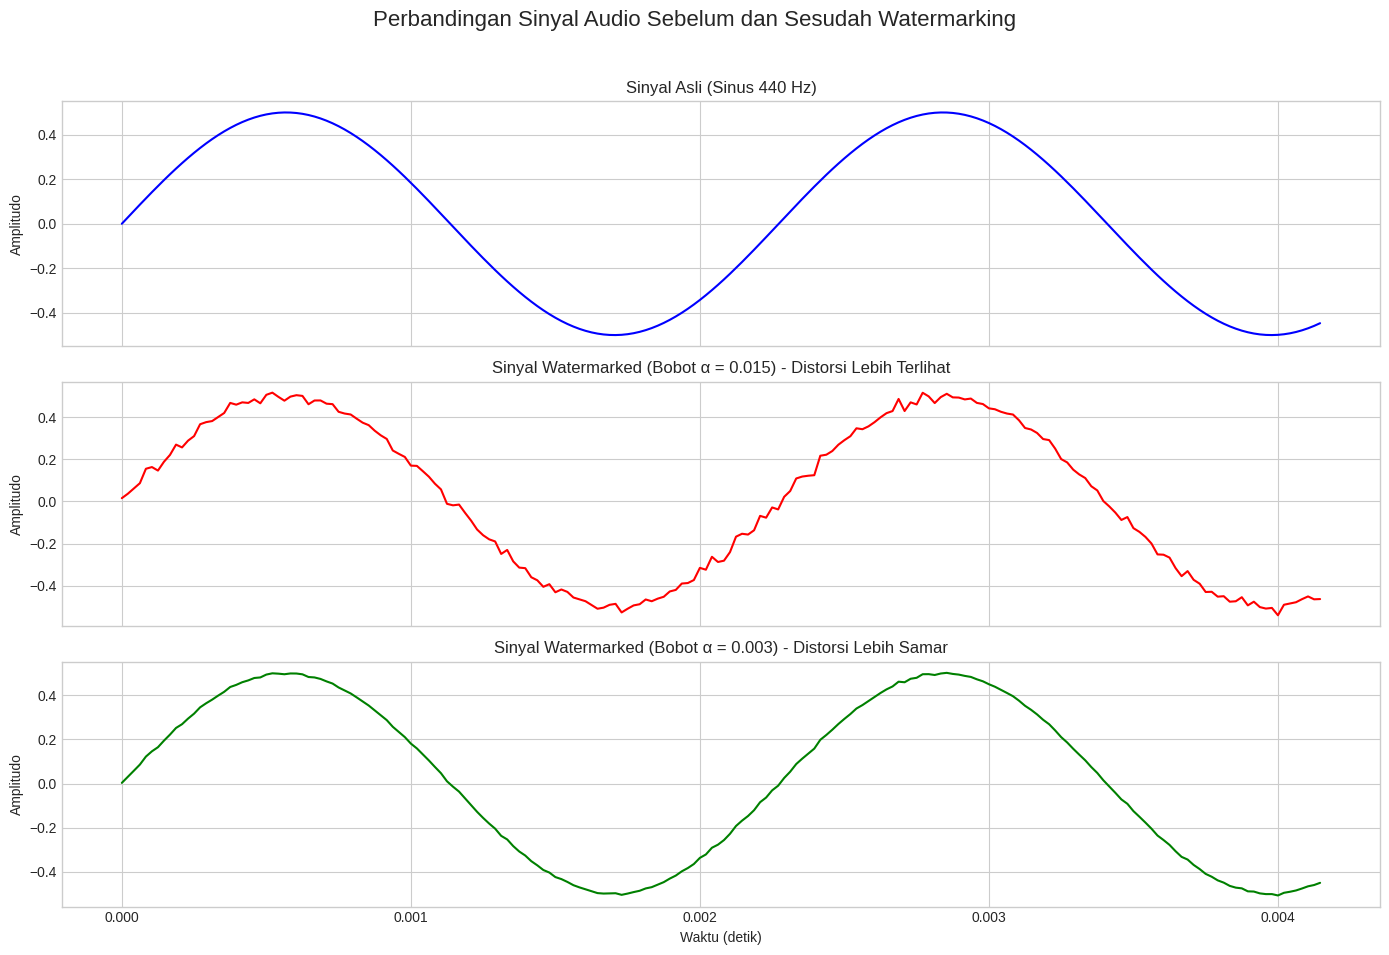


(b) Mencoba memainkan atau menyimpan suara...
Menyimpan file audio: sinyal_asli.wav
    Berhasil disimpan. Anda dapat memutarnya secara manual.
Menyimpan file audio: sinyal_watermarked_bobot_0.015.wav
    Berhasil disimpan. Anda dapat memutarnya secara manual.
Menyimpan file audio: sinyal_watermarked_bobot_0.003.wav
    Berhasil disimpan. Anda dapat memutarnya secara manual.


--- (c) Hasil Deteksi dan Penjelasan Efek Bobot ---
Skor deteksi dihitung menggunakan korelasi.
Ambang batas deteksi (threshold) bisa ditentukan di antara
skor sinyal kontrol dan sinyal watermarked.
------------------------------------------------------------
Skor Deteksi pada Sinyal Asli (Kontrol)          : 0.001140
Skor Deteksi pada Sinyal Watermarked (Bobot=0.015) : 0.016154
Skor Deteksi pada Sinyal Watermarked (Bobot=0.003) : 0.004143


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# --- PARAMETER UTAMA ---
SAMPLE_RATE = 48000  # Sample per detik
DURATION = 5  # Durasi sinyal dalam detik
FREQUENCY = 440.0  # Frekuensi sinus (Nada A4)
SEED = 718  # Seed berdasarkan bulan dan tanggal (0718)

# Variasi bobot (alpha) untuk watermarking
WEIGHT_1 = 0.015  # Bobot yang lebih kuat (lebih mudah dideteksi, lebih terdengar)
WEIGHT_2 = 0.003  # Bobot yang lebih lemah (lebih sulit dideteksi, kurang terdengar)

# --- LANGKAH 1: MEMBUAT SINYAL AUDIO ASLI ---
print("Langkah 1: Membuat sinyal audio asli...")
# Membuat sumbu waktu
t = np.linspace(0., DURATION, int(SAMPLE_RATE * DURATION), endpoint=False)
# Membuat sinyal sinusoida, amplitudo 0.5 agar tidak clipping
sinyal_asli = 0.5 * np.sin(2 * np.pi * FREQUENCY * t)
print(f"Sinyal sinusoida {int(FREQUENCY)} Hz ({DURATION} detik) telah dibuat.")

# --- LANGKAH 2: MEMBUAT SINYAL WATERMARK ---
print("\nLangkah 2: Membuat sinyal watermark...")
# Membuat generator angka acak dengan seed yang ditentukan
rng = np.random.default_rng(SEED)
# Membuat sinyal watermark (noise) dengan panjang yang sama seperti sinyal asli
watermark = rng.standard_normal(len(sinyal_asli))
print(f"Sinyal watermark berbasis noise telah dibuat dengan seed = {SEED}.")

# --- LANGKAH 3: PROSES EMBEDDING (PENYISIPAN) WATERMARK ---
print("\nLangkah 3: Menyisipkan watermark ke sinyal asli...")
sinyal_watermarked_1 = sinyal_asli + WEIGHT_1 * watermark
sinyal_watermarked_2 = sinyal_asli + WEIGHT_2 * watermark

# Normalisasi sinyal untuk mencegah clipping (amplitudo > 1.0 atau < -1.0)
sinyal_watermarked_1 = np.clip(sinyal_watermarked_1, -1.0, 1.0)
sinyal_watermarked_2 = np.clip(sinyal_watermarked_2, -1.0, 1.0)
print("Proses embedding watermark dengan 2 bobot berbeda telah selesai.")

# --- (a) TAMPILKAN GRAFIK SEBELUM DAN SESUDAH WATERMARKING ---
print("\n(a) Menampilkan grafik perbandingan sinyal...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
sampel_tampil = 200  # Tampilkan hanya 200 sampel pertama agar perbedaan terlihat

axs[0].plot(t[:sampel_tampil], sinyal_asli[:sampel_tampil], color='blue')
axs[0].set_title(f'Sinyal Asli (Sinus {int(FREQUENCY)} Hz)')
axs[0].set_ylabel('Amplitudo')
axs[0].grid(True)

axs[1].plot(t[:sampel_tampil], sinyal_watermarked_1[:sampel_tampil], color='red')
axs[1].set_title(f'Sinyal Watermarked (Bobot α = {WEIGHT_1}) - Distorsi Lebih Terlihat')
axs[1].set_ylabel('Amplitudo')
axs[1].grid(True)

axs[2].plot(t[:sampel_tampil], sinyal_watermarked_2[:sampel_tampil], color='green')
axs[2].set_title(f'Sinyal Watermarked (Bobot α = {WEIGHT_2}) - Distorsi Lebih Samar')
axs[2].set_ylabel('Amplitudo')
axs[2].set_xlabel('Waktu (detik)')
axs[2].grid(True)

plt.suptitle('Perbandingan Sinyal Audio Sebelum dan Sesudah Watermarking', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


# --- (b) MAINKAN ATAU SIMPAN SUARA ---
print("\n(b) Mencoba memainkan atau menyimpan suara...")
def mainkan_atau_simpan_suara(signal, sr, title):
    """Fungsi untuk memainkan atau menyimpan sinyal audio."""
    filename = f"{title.replace(' ', '_').lower()}.wav"
    print(f"Menyimpan file audio: {filename}")
    try:
        # Konversi ke format int16 yang umum untuk file WAV
        audio_data = (signal * 32767).astype(np.int16)
        write(filename, sr, audio_data)
        print(f"    Berhasil disimpan. Anda dapat memutarnya secara manual.")
    except Exception as e:
        print(f"    Gagal menyimpan file: {e}")

mainkan_atau_simpan_suara(sinyal_asli, SAMPLE_RATE, "Sinyal Asli")
mainkan_atau_simpan_suara(sinyal_watermarked_1, SAMPLE_RATE, f"Sinyal Watermarked Bobot {WEIGHT_1}")
mainkan_atau_simpan_suara(sinyal_watermarked_2, SAMPLE_RATE, f"Sinyal Watermarked Bobot {WEIGHT_2}")


# --- (c) PROSES DETEKSI DAN PENJELASAN EFEK BOBOT ---
def deteksi_watermark(sinyal_uji, watermark_asli):
    """Menghitung skor korelasi antara sinyal uji dan watermark."""
    return np.dot(sinyal_uji, watermark_asli) / len(sinyal_uji)

skor_deteksi_asli = deteksi_watermark(sinyal_asli, watermark)
skor_deteksi_wm1 = deteksi_watermark(sinyal_watermarked_1, watermark)
skor_deteksi_wm2 = deteksi_watermark(sinyal_watermarked_2, watermark)

print("\n\n--- (c) Hasil Deteksi dan Penjelasan Efek Bobot ---")
print("="*60)
print("Skor deteksi dihitung menggunakan korelasi.")
print("Ambang batas deteksi (threshold) bisa ditentukan di antara")
print("skor sinyal kontrol dan sinyal watermarked.")
print("-" * 60)
print(f"Skor Deteksi pada Sinyal Asli (Kontrol)          : {skor_deteksi_asli:.6f}")
print(f"Skor Deteksi pada Sinyal Watermarked (Bobot={WEIGHT_1}) : {skor_deteksi_wm1:.6f}")
print(f"Skor Deteksi pada Sinyal Watermarked (Bobot={WEIGHT_2}) : {skor_deteksi_wm2:.6f}")
print("="*60)